In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, unique
from matplotlib.ticker import MultipleLocator
from matplotlib.backends.backend_pdf import PdfPages

## Plot the CO spectra smoothed to 7".  
* Light gray: no masking
* Blue: Dilated masking
* Red: Smooth masking
* Black: 2D projection of smooth mask

In [2]:
line = 'co'
momtypes = ['Nomask', 'Dilated', 'Smooth', 'Mask2d']
colors   = ['silver', 'blue', 'red', 'black']
nx=7
ny=5

Number of galaxies: 126


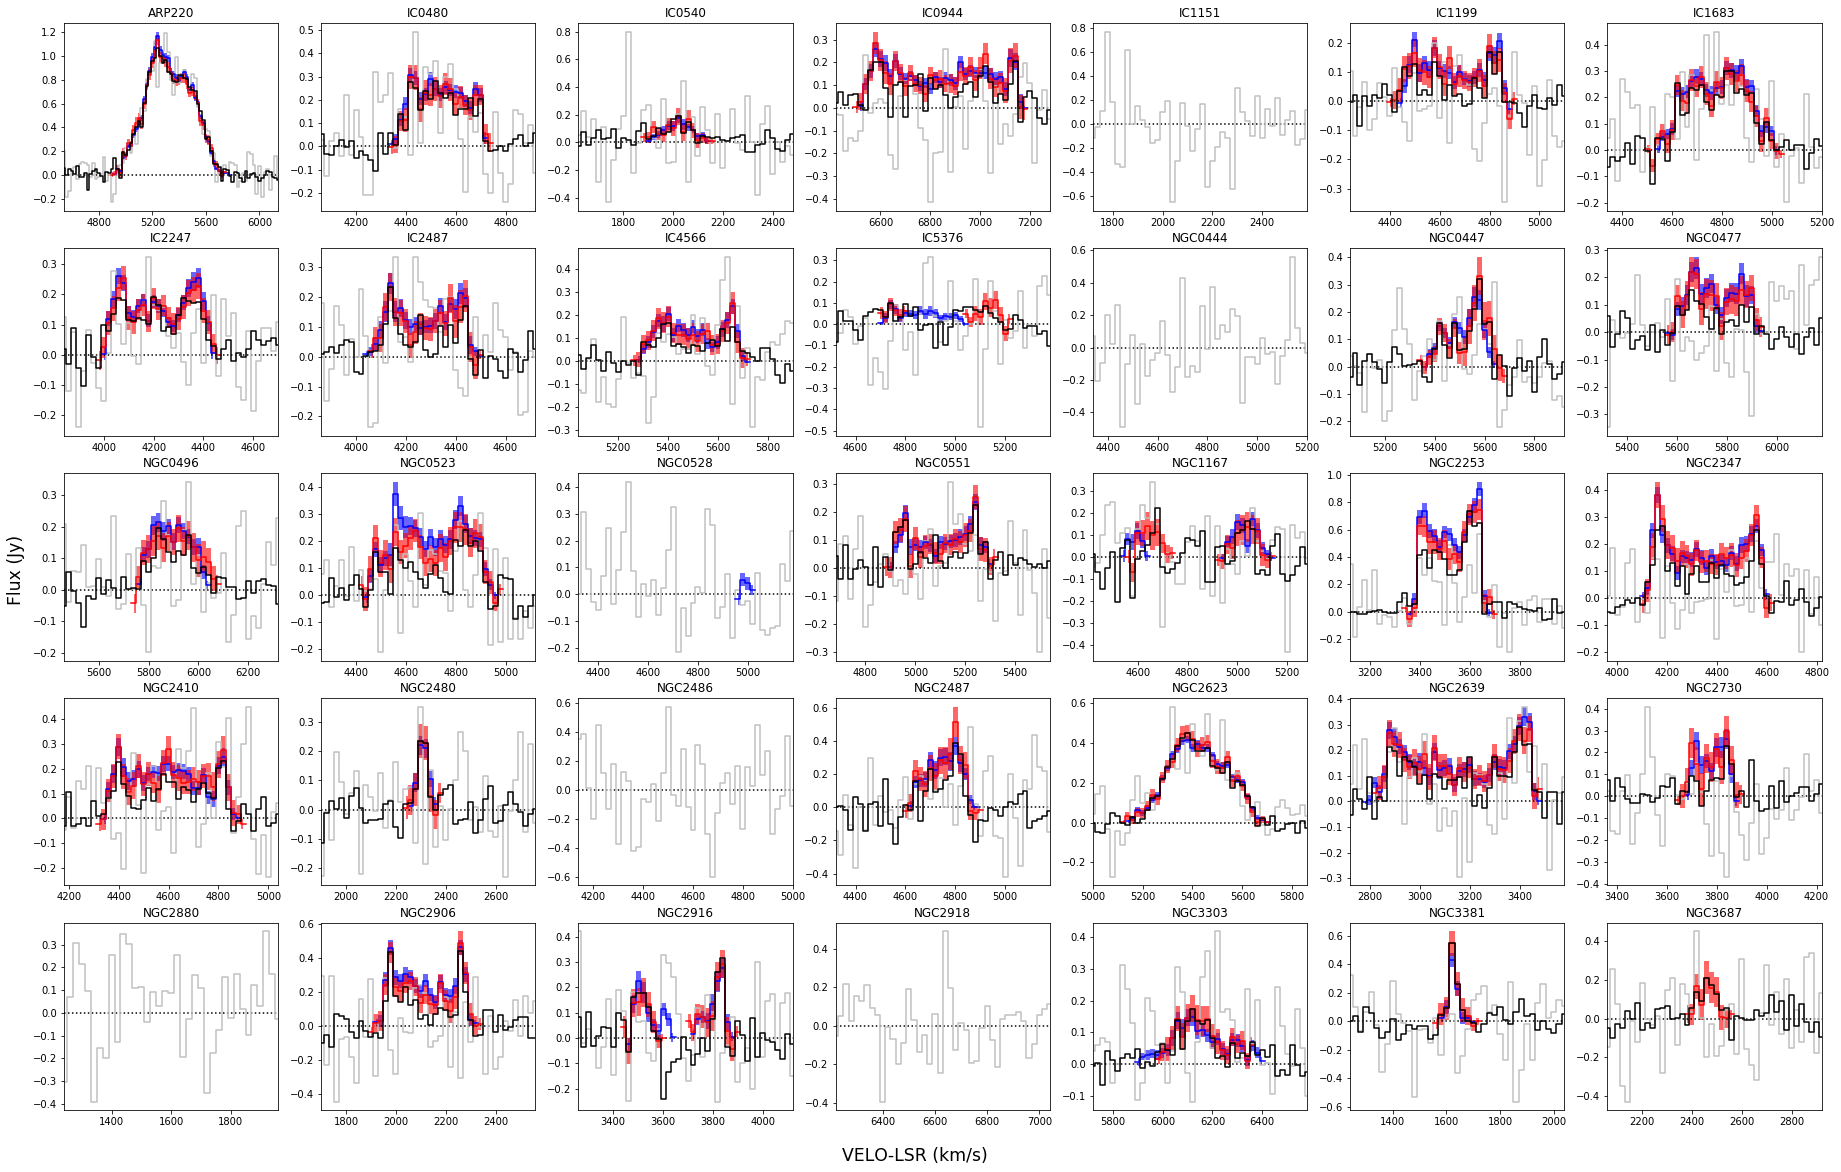

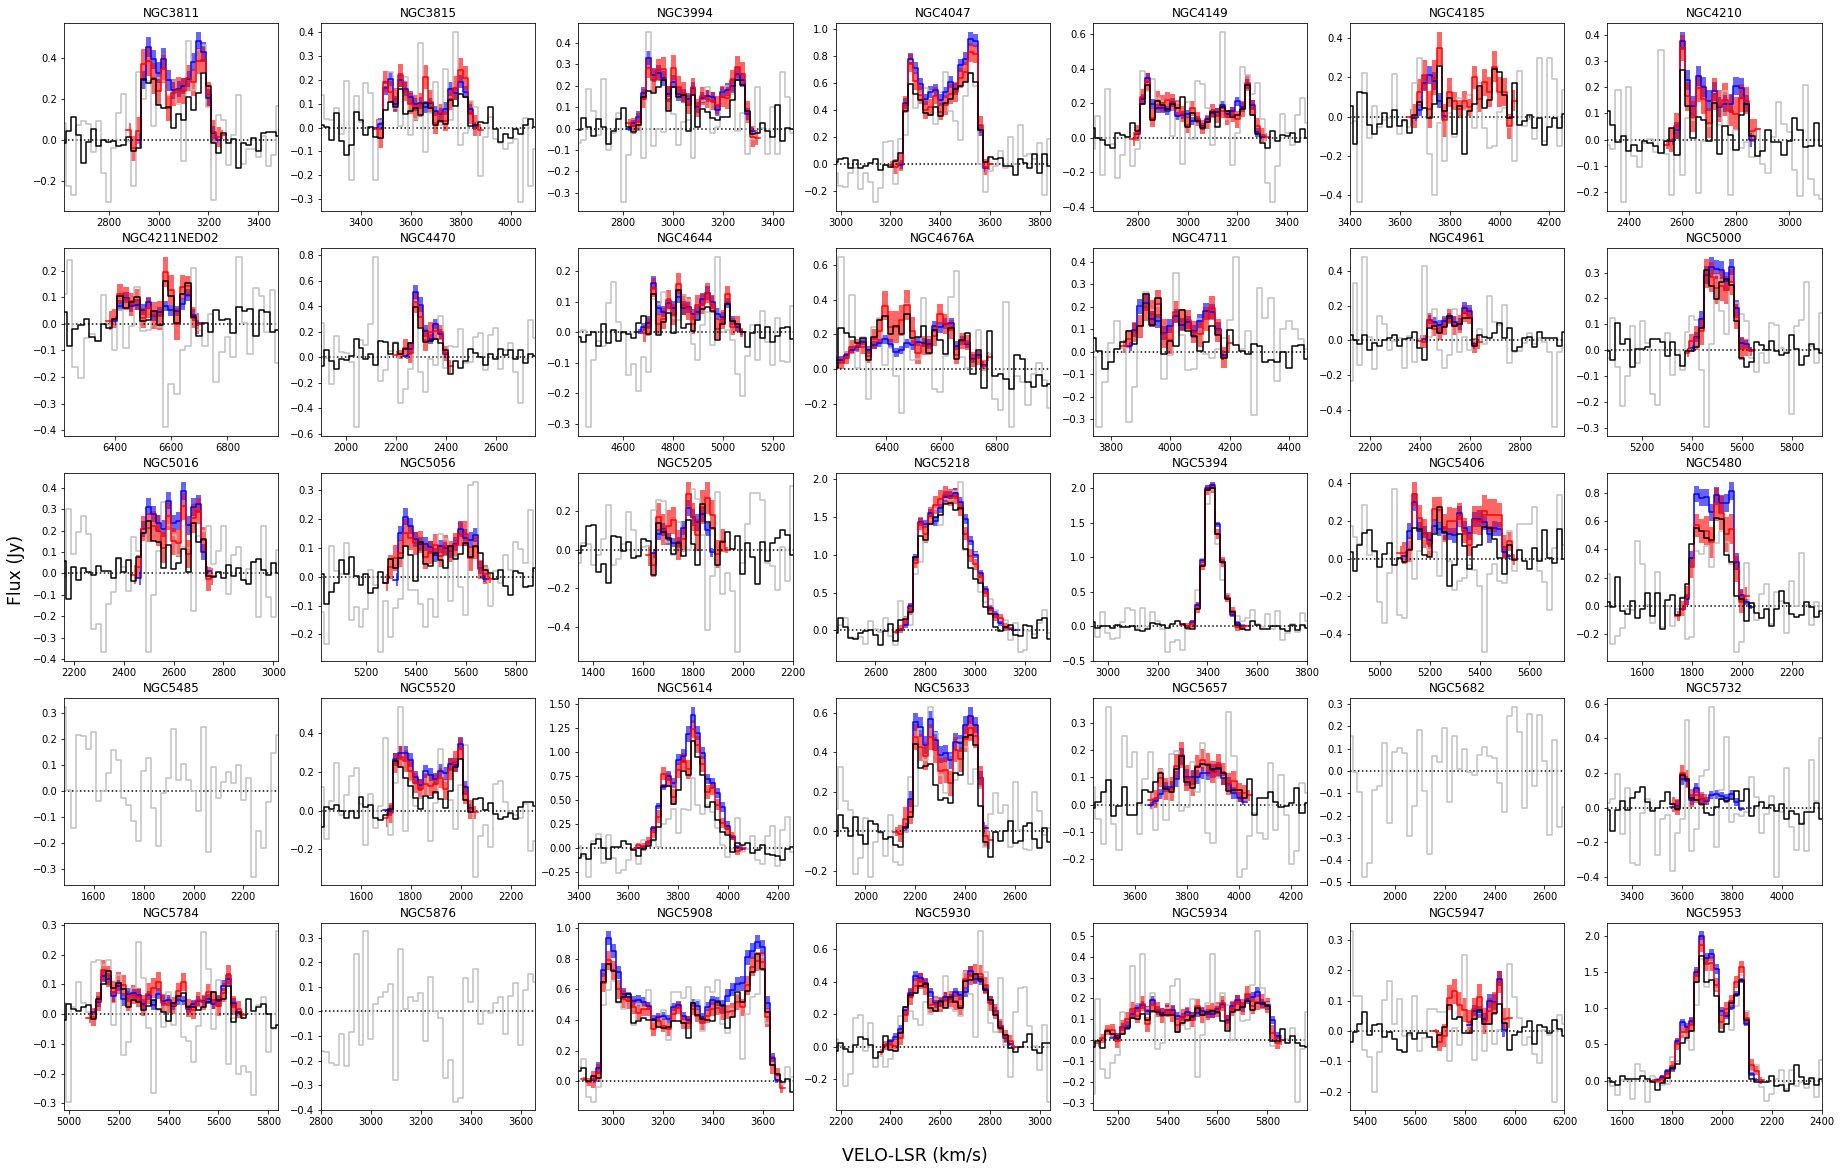

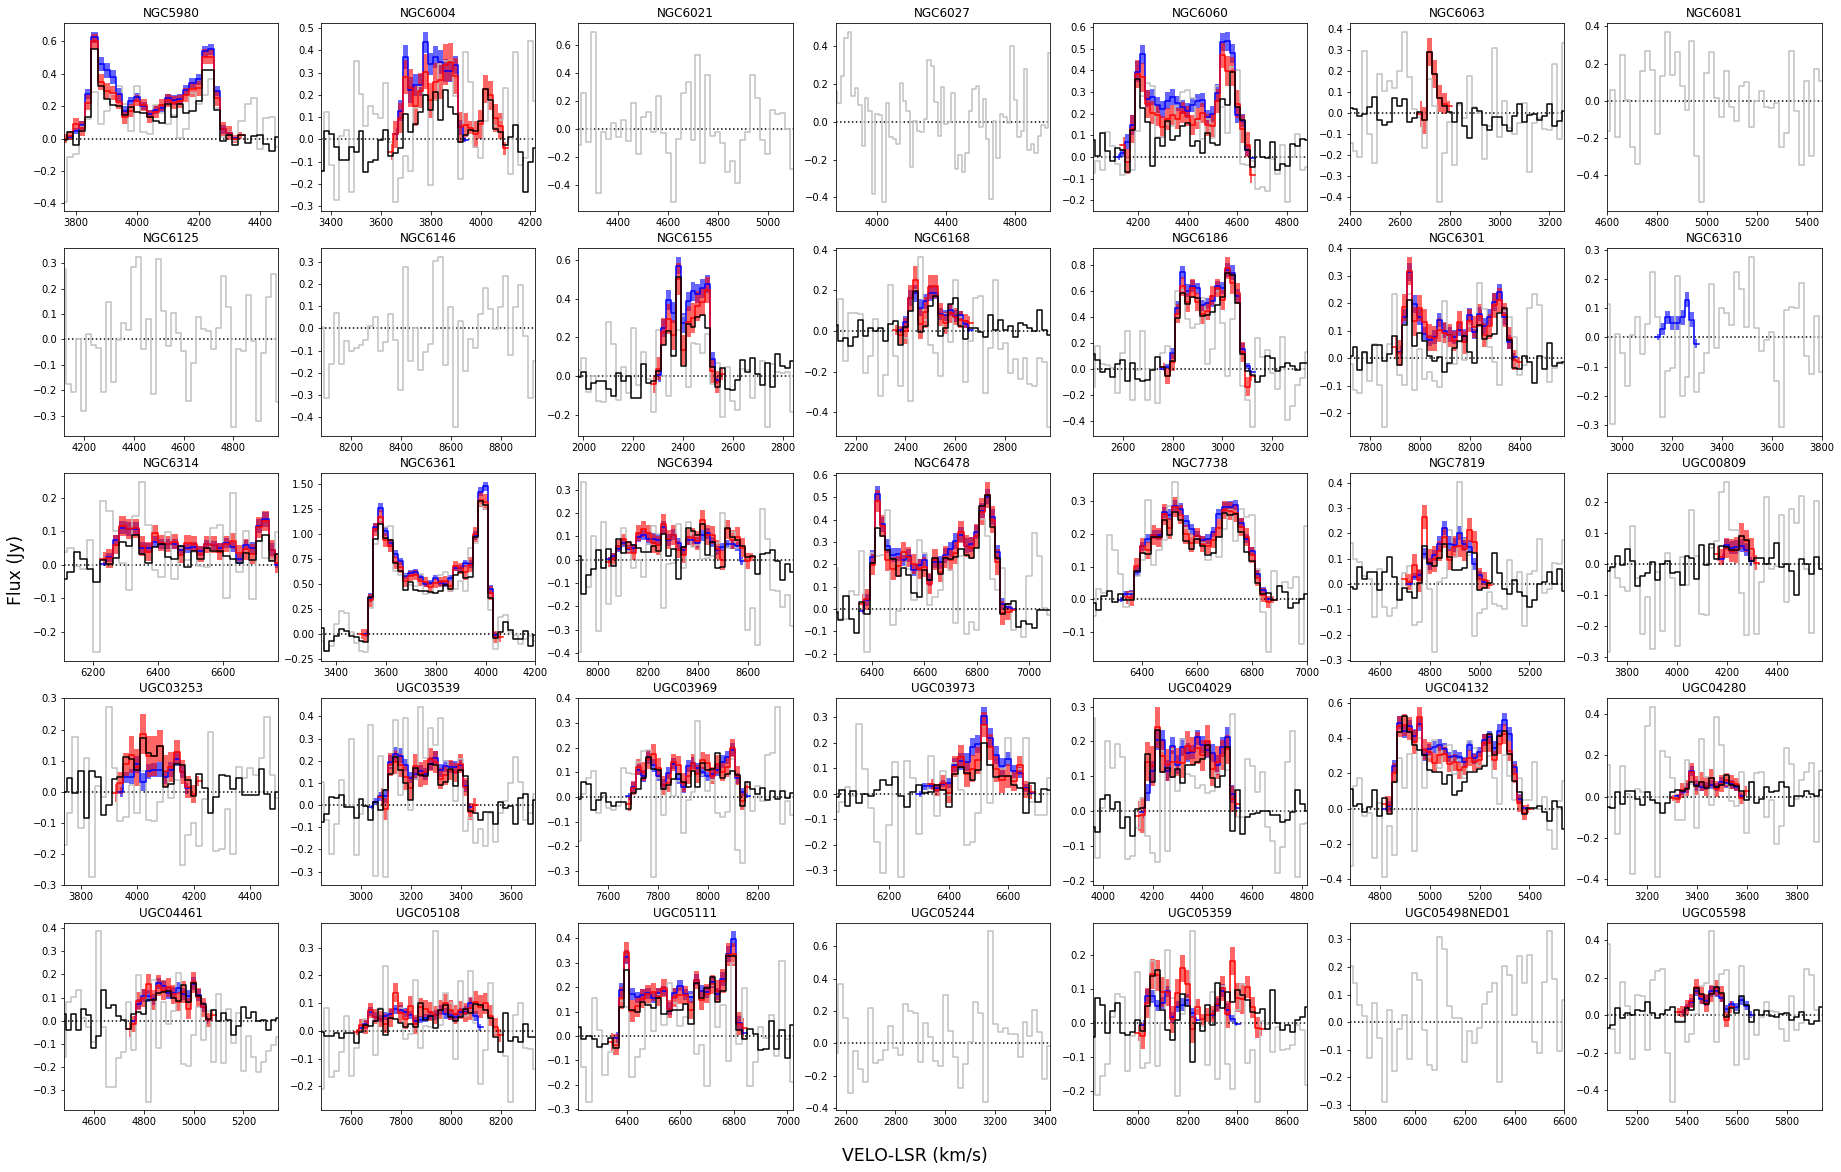

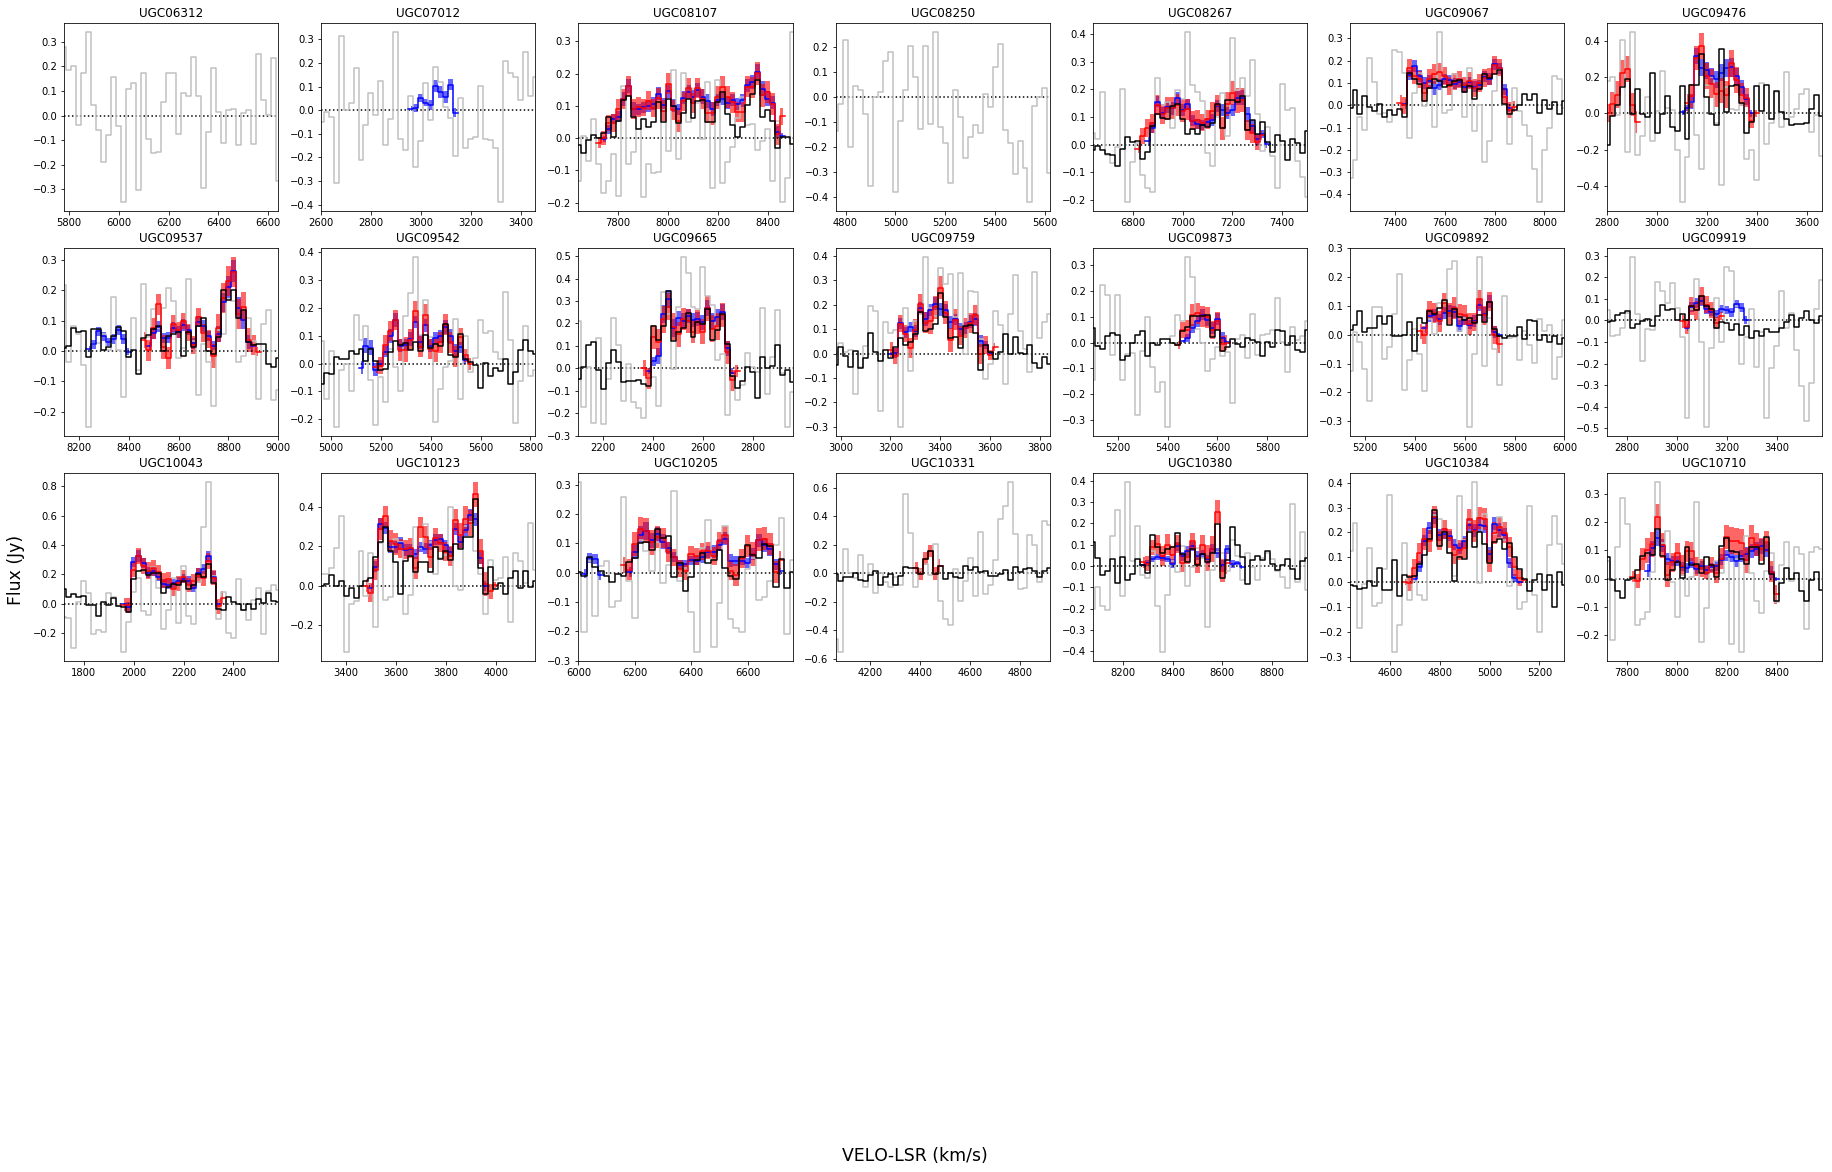

In [3]:
spectab = Table.read('../dat_prof/carma_spec/cospec_smo7.csv', format='ascii.ecsv')
gallist = unique(spectab, keys='Name').columns[0].tolist()
print('Number of galaxies: {}'.format(len(gallist)))
pages = int(np.ceil(float(len(gallist)) / (nx*ny)))

with PdfPages('cospec_smo7.pdf') as pdf:

    for num in range(0,pages):
        aa = nx*ny*num
        bb = nx*ny+aa
        sublist = gallist[aa:bb]

        fig = plt.figure(0)
        fig.set_size_inches(nx*4.5, ny*4.)

        for idx, gal in enumerate(sublist):
            galrows = spectab[spectab['Name']==gal]
            row, col = divmod(idx,nx)
            ax = plt.subplot2grid((ny,nx),(row,col))
            ax.axhline(y=0, xmin=0, xmax=1, color='black', ls=':')

            vel = galrows['coVlsr_smo7']
            for i, typ in enumerate(momtypes):
                flux   = galrows[line+typ+'Spec_smo7']
                eflux  = galrows[line+typ+'Unc_smo7']
                spec  = ax.step(vel, flux, color=colors[i], where='mid')
                if typ == 'Dilated' or typ == 'Smooth':
                    ax.fill_between(vel, flux-eflux, flux+eflux, 
                                    step='mid',facecolor=colors[i], alpha=0.6)
                ax.set_xlim(vel[0], vel[-1])
                plt.tick_params(axis='x', labelsize='medium')
                plt.tick_params(axis='y', labelsize='medium')
                start, end = ax.get_xlim()
                if (end-start)>1000:
                    majorLocator = MultipleLocator(400)
                else:
                    majorLocator = MultipleLocator(200)
                ax.xaxis.set_major_locator(majorLocator)
            ax.set_title(gal, fontsize='large')

        fig.text(0.5, 0.09, 'VELO-LSR (km/s)', ha='center',
                    fontsize='xx-large')
        fig.text(0.1, 0.5, 'Flux (Jy)', va='center', rotation='vertical', 
                    fontsize='xx-large')
        pdf.savefig(bbox_inches = 'tight', pad_inches=0.1)
        plt.show()
        plt.close()